# Chargement des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Projet de Modèle de Scoring pour la Prédiction de Faillite Client
## Introduction
Ce projet vise à développer un modèle de scoring de crédit pour l'entreprise "Prêt à Dépenser". Ce modèle permettra de prédire la probabilité qu'un client rembourse son crédit et ainsi d'automatiser le processus de décision d'octroi de crédit.
## Objectifs

* Construire un modèle de scoring précis et interprétable.
* Mettre en place une pipeline MLOps pour assurer la robustesse et la maintenabilité du modèle.
* Développer une API pour servir les prédictions du modèle.

## Données
De nombreuses personnes ont du mal à obtenir des prêts en raison d'antécédents de crédit insuffisants ou inexistants. Et, malheureusement, cette population est souvent exploitée par des prêteurs peu fiables.

Home Credit s'efforce d'élargir l'inclusion financière de la population non bancarisée en offrant une expérience d'emprunt positive et sûre. Afin de s'assurer que cette population mal desservie bénéficie d'une expérience de prêt positive, Home Credit utilise une variété de données alternatives, notamment des informations sur les télécommunications et les transactions, pour prédire les capacités de remboursement de ses clients.

Bien que Home Credit utilise actuellement diverses méthodes statistiques et d'apprentissage automatique pour faire ces prédictions, ils mettent Kagglers au défi de les aider à exploiter tout le potentiel de leurs données. Cela permettra de garantir que les clients capables de rembourser ne soient pas rejetés et que les prêts soient accordés avec un capital, une échéance et un calendrier de remboursement qui permettront à leurs clients de réussir.

* **Sources des données :** La base de données est disponible sur kaggle en cliquant [ici](https://www.kaggle.com/competitions/home-credit-default-risk)
* **Structure des données :** Nous avons a notre disposition 10 jeux de données en total:
### application_{train|test}.csv
* **Description:** Table principale contenant les données statiques de chaque demande de prêt.
* **Contenu:** Une ligne par demande.

### bureau.csv
* **Description:** Historique des crédits précédents par client.
* **Contenu:** Plusieurs lignes par client.

### bureau_balance.csv
* **Description:** Soldes mensuels détaillés des crédits précédents.
* **Contenu:** Une ligne par mois et par crédit.

### POS_CASH_balance.csv
* **Description:** Historique des soldes mensuels des prêts à la consommation et en espèces.
* **Contenu:** Une ligne par mois et par prêt.

### credit_card_balance.csv
* **Description:** Historique des soldes mensuels des cartes de crédit.
* **Contenu:** Une ligne par mois et par carte de crédit.

### previous_application.csv
* **Description:** Historique des demandes de prêt précédentes.
* **Contenu:** Une ligne par demande.

### installments_payments.csv
* **Description:** Historique des remboursements.
* **Contenu:** Une ligne par paiement ou échéance manquante.

### sample_submission.csv
* **Description:** Indique le format des résultats à soumettre de la compétition Kaggle, sans intégrer cette table au projet.

### HomeCredit_columns_description.csv
* **Description:** Dictionnaire de données pour toutes les colonnes.
La relation entre les tables se fait via des clés étrangères 

<img src="../data/home_credit.png" alt="shema des données Home Credit Default Risk" width="800" height="500">

* **En raison des limitations de performance de nos machines, je me limite aux deux jeux de données application_train.csv et application_test.csv**
## Structure des données:
### Analyse de Forme :
* **visualisation du jeu de données train et test:**

In [2]:
df_train =  pd.read_csv('../data/application_train.csv')
df_test =  pd.read_csv('../data/application_test.csv')
df_description = pd.read_csv('../data/HomeCredit_columns_description.csv', encoding='latin')
pd.set_option('display.max_column', 122) # Afficher l'ensemble des colonnes
pd.set_option('display.max_row', 67) # Afficher l'ensemble des lignes

In [14]:
print(f'Nombre de lignes et colonnes dans application_train.csv : {df_train.shape}')
df_train.head()

Nombre de lignes et colonnes dans application_train.csv : (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
print(f'Nombre de lignes et colonnes dans application_test.csv : {df_test.shape}')
df_test.head()

Nombre de lignes et colonnes dans application_test.csv : (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

La première colonne de nos deux jeux de données, 'SK_ID_CURR', correspond à l'identifiant unique de chaque prêt. Nous devons l'exclure de notre analyse pour éviter tout biais dans le modèle.

In [5]:
print(f'Colonnes dans df_train mais pas dans df_test:{set(df_train.columns) -  set(df_test.columns)}')
print(f'Colonnes dans df_test mais pas dans df_train:{set(df_test.columns) -  set(df_train.columns)}')

Colonnes dans df_train mais pas dans df_test:{'TARGET'}
Colonnes dans df_test mais pas dans df_train:set()
Nombre de lignes et colonnes dans application_train.csv : (307511, 122)
Nombre de lignes et colonnes dans application_test.csv : (48744, 121)


Les jeux de données train et test (application) contiennent les mêmes variables (colonnes), à l'exception de la variable cible 'Target' à prédire."


* **Type de viariables dans le jeu de données train:**

In [6]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [7]:
df_test.dtypes.value_counts()

float64    65
int64      40
object     16
Name: count, dtype: int64

Les types de variables disponiblent dans le jeu de données application_train.csv:
 - Variables qualitatives : 65 (float64)
 - Variables quantitatives : 57 (int64 et objet)

Parmi les variables quantitatives dans train nous retrouvons la variable TARGET :
 - 1 - client en difficulté de paiement : il/elle a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du prêt dans notre échantillon
 - 0 - tous les autres cas)


* **Analyse des valeurs manquantes :**

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Pourcentage de valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Faire un tableau avec les résultats
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Renommer les colonnes
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% des valeurs totales'})

        # Trier le tableau par pourcentage décroissant
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% des valeurs totales', ascending=False).round(1)

        # Afficher les informations récapitulatives
        print ("Le jeu de données contient " + str(df.shape[1]) + " colonnes.\n"
            + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contiennent des valeurs manquantes.")
        # Renvoyer le dataframe avec les informations manquantes
        return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(df_train)

Le jeu de données contient 122 colonnes.
67 colonnes contiennent des valeurs manquantes.


### Analyse avancée :

Les noyaux Kaggle nous ont été recommandés pour faciliter notre analyse exploratoire

[Pour l’analyse exploratoire](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

[Pour la préparation des données et le feature engineering](https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script)



* **Visualisation de la target :**

In [10]:
df_train['TARGET'].value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

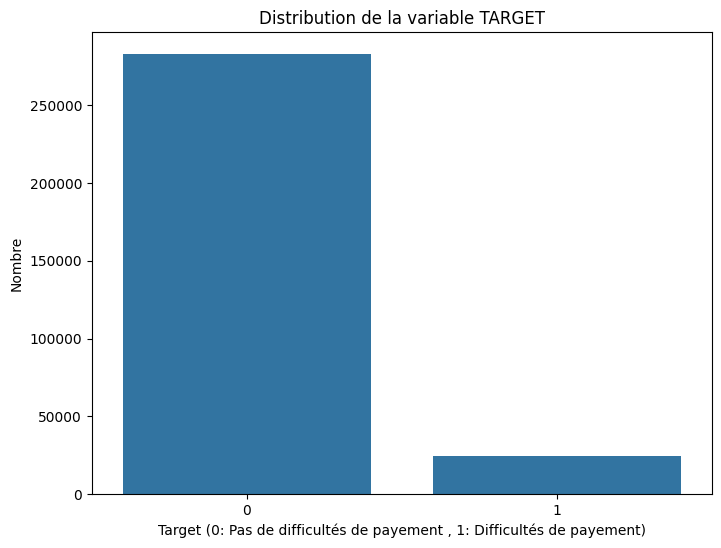

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=df_train)
plt.title('Distribution de la variable TARGET')
plt.xlabel('Target (0: Pas de difficultés de payement , 1: Difficultés de payement)')
plt.ylabel('Nombre')
plt.show()

Le jeu de données présente un déséquilibre de classes important (91,9% vs 8%). risque de biaiser le modèle vers la classe majoritaire (clients sans difficultés de payement). 
Cette asymétrie nécessite une attention particulière dans la conception du modèle, Des techniques spécifiques sont nécessaires pour y remédier

* **Valeurs manquantes:**

In [12]:
df_description = df_description[df_description['Table'] == 'application_{train|test}.csv'][['Row', 'Description', 'Special']].set_index('Row')
missing_values = pd.merge(missing_values, df_description, left_index=True, right_index=True, how='left')

In [13]:
missing_values

,Valeurs manquantes,% des valeurs totales,Description,Special
COMMONAREA_MEDI,214865,69.9,Normalized information about building where th...,normalized
COMMONAREA_MODE,214865,69.9,Normalized information about building where th...,normalized
COMMONAREA_AVG,214865,69.9,Normalized information about building where th...,normalized
NONLIVINGAPARTMENTS_MODE,213514,69.4,Normalized information about building where th...,normalized
NONLIVINGAPARTMENTS_MEDI,213514,69.4,Normalized information about building where th...,normalized
NONLIVINGAPARTMENTS_AVG,213514,69.4,Normalized information about building where th...,normalized
FONDKAPREMONT_MODE,210295,68.4,Normalized information about building where th...,normalized
LIVINGAPARTMENTS_AVG,210199,68.4,Normalized information about building where th...,normalized
LIVINGAPARTMENTS_MEDI,210199,68.4,Normalized information about building where th...,normalized
LIVINGAPARTMENTS_MODE,210199,68.4,Normalized information about building where th...,normalized


- 67 colonnes contiennent des valeurs manquantes.
- 47 colonnes sont des informations normalisées sur le bâtiment où vit le client, avec des tx de valeur manquante à partir de 47.4
- OWN_CAR_AGE (Âge de la voiture du client): 66 % de valeurs sont manquantes
- EXT_SOURCE_1 (information normalisée, depuis source externe, mais pas d'info supplémentaire dans la description) : 56.4 %
- OCCUPATION_TYPE (type de profession du le client): 31.1 % de données manquantes
- les 17 colonnes restante, ont des tx de valeurs manquantes inférieure à 20%
  
Pour construire nos modèles de prédiction, nous devons préparer nos données. Certains modèles ne peuvent pas fonctionner avec des valeurs manquantes. Nous allons donc devoir traiter ce problème. Pour l'instant, nous gardons toutes les colonnes pour bien comprendre leur rôle dans la prédiction. Mais avant d'entraîner nos modèles, nous devrons peut-être supprimer celles qui contiennent trop de données manquantes

* **Variables Qualitatives:**

In [61]:
str(missing_values.loc['NAME_TYPE_SUITE', '% des valeurs totales'])

'0.4'

In [66]:
var_cat = df_train.drop(columns=['SK_ID_CURR', 'TARGET'], axis=1).select_dtypes(include=['object']).columns.to_list()
print(f'''Notre jeu de données train contient {len(var_qual)} variables qualitatives
voici la liste :''')
for var in var_cat:
    #if var in missing_values.index:
        #print(missing_values.iloc[var])
    print(f'{var :-<40} {len(df_train[var].unique())} valeurs unqiues', ' et ' + str(missing_values.loc[var, '% des valeurs totales']) + ' % de valeur manquantes' if var in missing_values.index else '', f' : {df_train[var].unique()}')


Notre jeu de données train contient 16 variables qualitatives
voici la liste :
NAME_CONTRACT_TYPE---------------------- 2 valeurs unqiues   : ['Cash loans' 'Revolving loans']
CODE_GENDER----------------------------- 3 valeurs unqiues   : ['M' 'F' 'XNA']
FLAG_OWN_CAR---------------------------- 2 valeurs unqiues   : ['N' 'Y']
FLAG_OWN_REALTY------------------------- 2 valeurs unqiues   : ['Y' 'N']
NAME_TYPE_SUITE------------------------- 8 valeurs unqiues  et 0.4 % de valeur manquantes  : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE------------------------ 8 valeurs unqiues   : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE--------------------- 5 valeurs unqiues   : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS---------------------- 6 valeurs un

La plupart des variables qualitatives ont un nombre relativement faible d'entrées uniques et des valleurs manquantes.
Nous devrons trouver un moyen de gérer ces variables qualitatives dans notre modéles.

* **Variables catégorielles:**

In [22]:
var_cat = df_train.select_dtypes(include=['int64']).columns.to_list()
var_cat

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [23]:
df_train[var_cat].apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN